<a href="https://colab.research.google.com/github/sunilkonatham/basicPythonForDataScience/blob/master/Computer_vision_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

from bs4 import BeautifulSoup

In [8]:
images_path = '/content/drive/MyDrive/cnn_image_usecase/archive/images'
annotations_path = '/content/drive/MyDrive/cnn_image_usecase/archive/annotations'

In [15]:
images = sorted(os.listdir(images_path))

annotations = sorted(os.listdir(annotations_path))

In [16]:
len(images)

853

In [17]:
len(annotations)

853

In [22]:
images[100]

'maksssksksss189.png'

In [23]:
annotations[100]

'maksssksksss189.xml'

In [25]:
#Exporting the labels present in the annotations file
def generate_label_dictionary(annotations_locations):

  with open(annotations_locations) as annotations_file:
    soup = BeautifulSoup(annotations_file.read(), 'xml')
    objects = soup.find_all('object')
    number_persons = len(objects)

  boxes = []
  labels = []

  for obj in objects:
    if obj.find('name').text == 'without_mask':
      labels.append(0)
    elif obj.find('name').text == 'with_mask':
      labels.append(2)
    elif obj.find('name').text == 'mask_weared_incorrect':
      labels.append(1)
    else:
      break
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    boxes.append([xmin,ymin,xmax,ymax])
  
  boxes = np.array(boxes)
  labels = np.array(labels)

  target = {}
  target['labels'] = labels
  target['boxes'] = boxes

  return target, number_persons



In [29]:
target_number = []
persons_number = []

for file in annotations:
  file_path = annotations_path +'/'+ file
  target_image, number_of_persons_in_each_image = generate_label_dictionary(file_path)
  #print(file_path)
  #print(target_image)
  target_number.append(target_image)
  #print(number_of_persons_in_each_image)
  persons_number.append(number_of_persons_in_each_image)



In [30]:
from IPython.display import Image

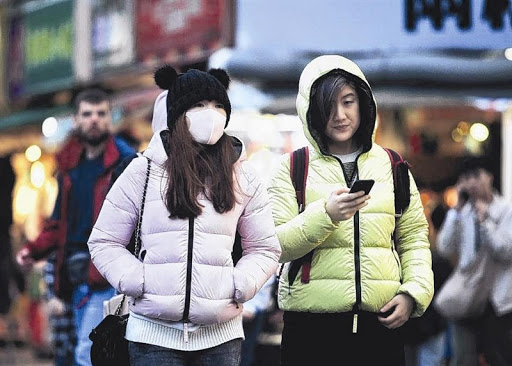

In [31]:
Image(filename='/content/drive/MyDrive/cnn_image_usecase/archive/images/maksssksksss0.png')

In [32]:
target_number[0]

{'boxes': array([[ 79, 105, 109, 142],
        [185, 100, 226, 144],
        [325,  90, 360, 141]]), 'labels': array([0, 2, 0])}

In [33]:
np.sum(persons_number)

4072